In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")
from sklearn.model_selection import train_test_split
import category_encoders as ce
from sklearn.preprocessing import RobustScaler

In [4]:
df=pd.read_csv('IncomeData.csv')

In [5]:
df.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
df.shape

(32561, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       30725 non-null  object
 2    education       32561 non-null  object
 3    education-num   32561 non-null  int64 
 4    marital-status  32561 non-null  object
 5    occupation      30718 non-null  object
 6    relationship    32561 non-null  object
 7    race            32561 non-null  object
 8    sex             32561 non-null  object
 9    capital-gain    32561 non-null  int64 
 10   capital-loss    32561 non-null  int64 
 11   hours-per-week  32561 non-null  int64 
 12   native-country  31978 non-null  object
 13   income          32561 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.5+ MB


#### there are some null values,
##### will remove accordingly

In [8]:
df.columns

Index(['age', ' workclass', ' education', ' education-num', ' marital-status',
       ' occupation', ' relationship', ' race', ' sex', ' capital-gain',
       ' capital-loss', ' hours-per-week', ' native-country', ' income'],
      dtype='object')

### The names of the columns are not proper (having spaces, '-' etc)
#### Setting up the names

In [9]:
edited_cols = ['age', 'workclass', 'education', 'education_num', 'marital_status', 'occupation', 'relationship',
             'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']
df.columns = edited_cols

df.columns

Index(['age', 'workclass', 'education', 'education_num', 'marital_status',
       'occupation', 'relationship', 'race', 'sex', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country', 'income'],
      dtype='object')

## Categorical Columns

In [10]:
cat_columns=[col for col in df.columns if df[col].dtype=='object']

In [11]:
cat_columns

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'income']

In [12]:
for val in cat_columns:
    print('Columns Name: ----------------------------------%s'%val)
    print(df[val].value_counts())

Columns Name: ----------------------------------workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
Columns Name: ----------------------------------education
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64
Columns Name: ----------------------------------marital_status
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-a

## Numerical Columns

In [13]:
num_columns=[col for col in df.columns if df[col].dtype=='int64']

In [14]:
num_columns

['age', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
education_num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital_gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital_loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours_per_week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


## Target Column

In [16]:
df['income'].value_counts()

 <=50K    24720
 >50K      7841
Name: income, dtype: int64

In [17]:
df['income'].value_counts()/len(df)

 <=50K    0.75919
 >50K     0.24081
Name: income, dtype: float64

## Data Engineering and EDA

### Categorical Columns

#### work_class

In [18]:
df['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [19]:
df.columns

Index(['age', 'workclass', 'education', 'education_num', 'marital_status',
       'occupation', 'relationship', 'race', 'sex', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country', 'income'],
      dtype='object')

Text(0.5, 1.0, 'Frequency Distribution of WorkClass')

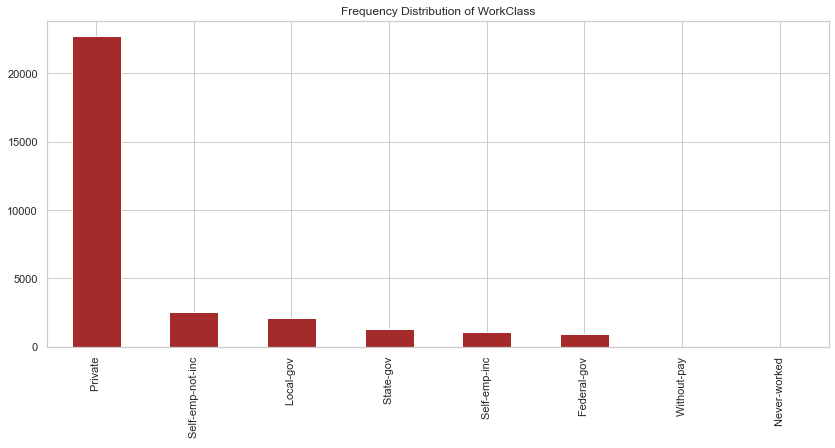

In [20]:
plt.figure(figsize=(14,6))
ax=df['workclass'].value_counts().plot(kind='bar',color='brown')
ax.set_title('Frequency Distribution of WorkClass')

##### More Private workers compared to anyother

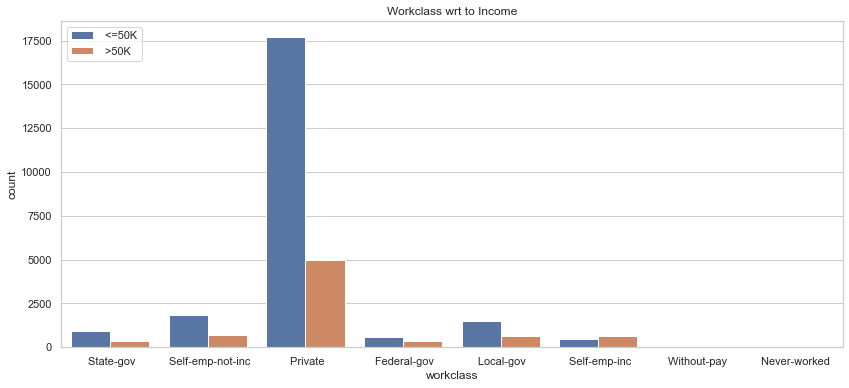

In [21]:
plt.figure(figsize=(14,6))
ax=sns.countplot(x='workclass',hue='income',data=df)
ax.set_title('Workclass wrt to Income')
ax.legend()

#### Most of the people are earning <=50k

#### occupation

In [22]:
df['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [23]:
df['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

Text(0.5, 1.0, 'Frequency Distribution of Occupation')

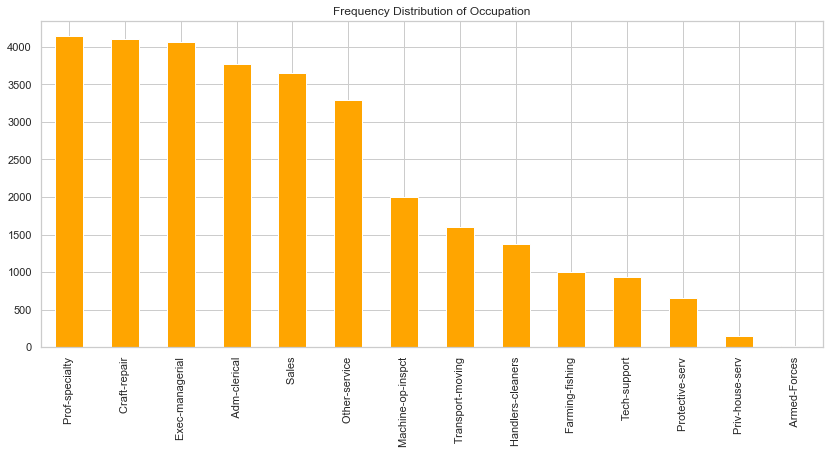

In [24]:
plt.figure(figsize=(14,6))
ax=df['occupation'].value_counts().plot(kind='bar',color='orange')
ax.set_title('Frequency Distribution of Occupation')

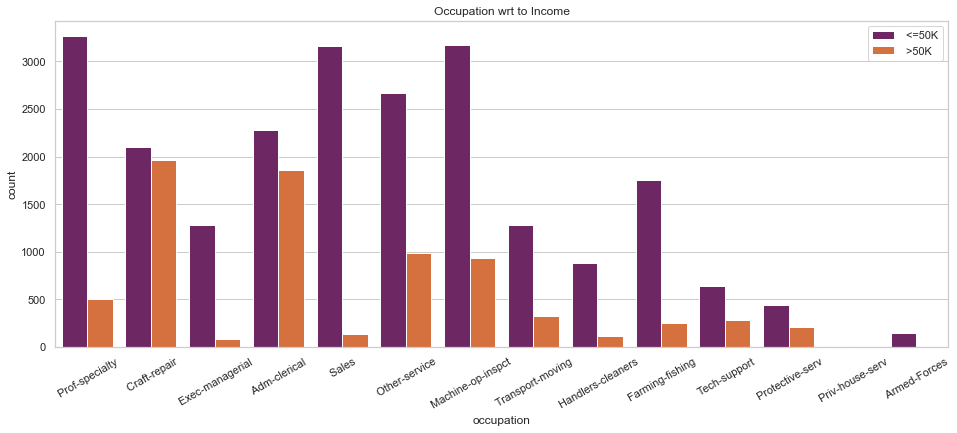

In [25]:
plt.figure(figsize=(16,6))
ax=sns.countplot(x='occupation',hue='income',data=df,palette='inferno')
ax.set_title('Occupation wrt to Income')
ax.set_xticklabels(df.occupation.value_counts().index, rotation=30)
ax.legend()

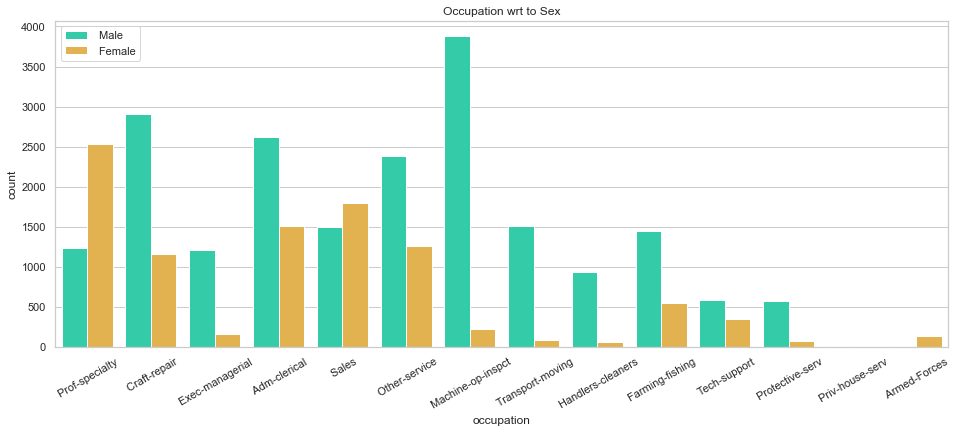

In [26]:
plt.figure(figsize=(16,6))
ax=sns.countplot(x='occupation',hue='sex',data=df,palette='turbo')
ax.set_title('Occupation wrt to Sex')
ax.set_xticklabels(df.occupation.value_counts().index, rotation=30)
ax.legend()

#### Most of the occuaptions are dominated by Males
##### Sales and Prof-speciality are the regions where females are more

#### martial_status

In [27]:
df['marital_status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital_status, dtype: int64

#### relationship

In [28]:
df['relationship'].value_counts()

 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: relationship, dtype: int64

#### race

In [29]:
df['race'].value_counts()

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64

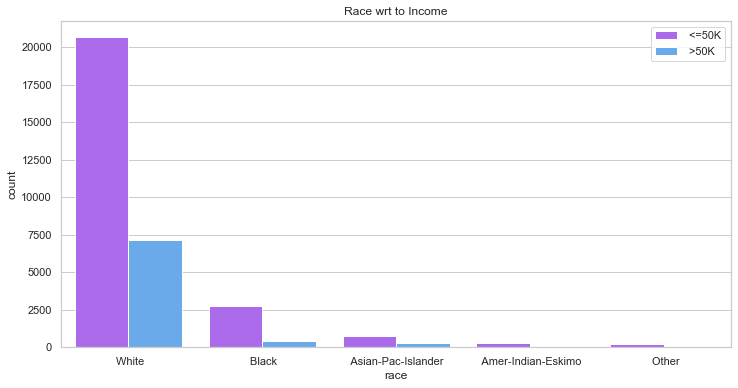

In [30]:
plt.figure(figsize=(12,6))
ax=sns.countplot(x='race',hue='income',data=df,palette='cool_r')
ax.set_title('Race wrt to Income')
ax.legend()

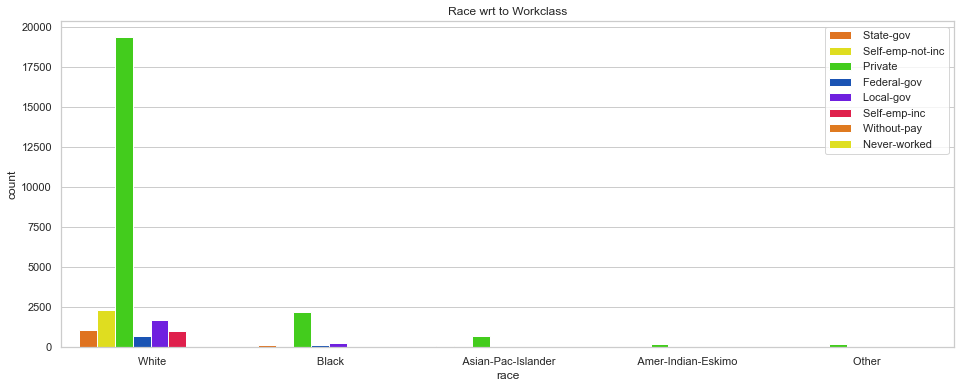

In [31]:
plt.figure(figsize=(16,6))
ax=sns.countplot(x='race',hue='workclass',data=df,palette='prism')
ax.set_title('Race wrt to Workclass')
ax.legend(loc='upper right')

#### native country

In [32]:
df['native_country'].value_counts()

 United-States                 29170
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 France                           29
 

#### the data we have is more domianted with 'UnitedStates'

## Numerical Columns

In [33]:
num_columns

['age', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']

#### age

In [34]:
df['age'].unique()

array([39, 50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 40, 34, 25, 43,
       54, 35, 59, 56, 19, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 18, 47,
       46, 36, 79, 27, 67, 33, 76, 17, 55, 61, 70, 64, 71, 68, 66, 51, 58,
       26, 60, 90, 75, 65, 77, 62, 63, 80, 72, 74, 69, 73, 81, 78, 88, 82,
       83, 84, 85, 86, 87], dtype=int64)

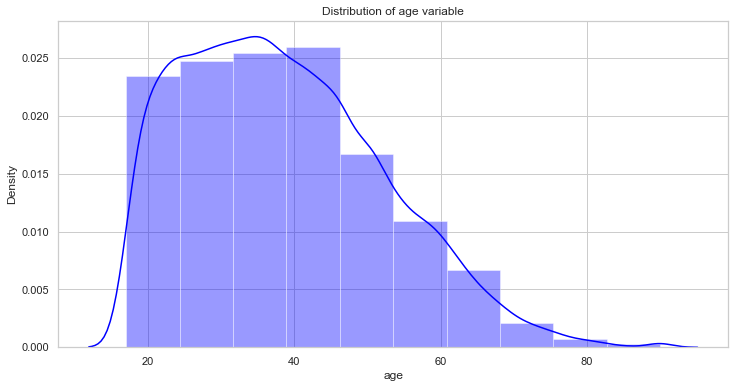

In [35]:
plt.figure(figsize=(12,6))
ax = sns.distplot(df['age'], bins=10, color='blue')
ax.set_title("Distribution of age variable")
plt.show()

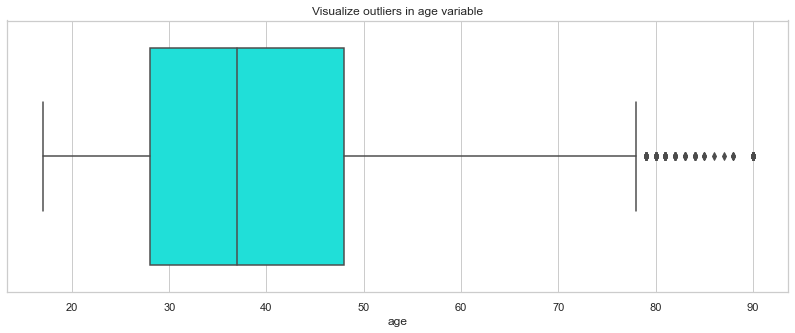

In [36]:
plt.figure(figsize=(14,5))
ax = sns.boxplot(df['age'],palette='hsv')
ax.set_title("Visualize outliers in age variable")
plt.show()

###### we can find outliers in the age data

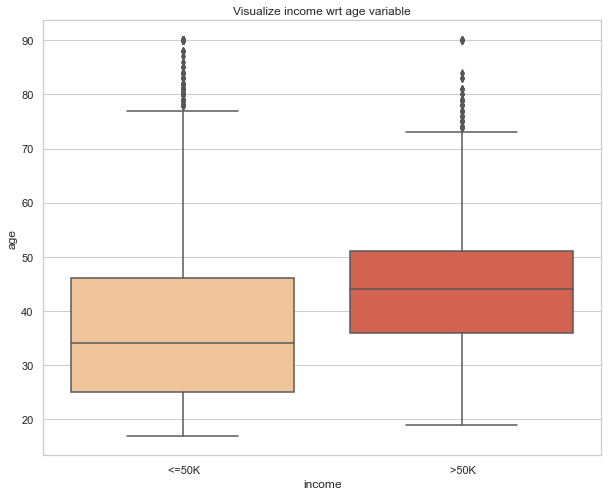

In [37]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.boxplot(x="income", y="age", data=df,palette='OrRd')
ax.set_title("Visualize income wrt age variable")
plt.show()

###### as the age increases, salary also increases

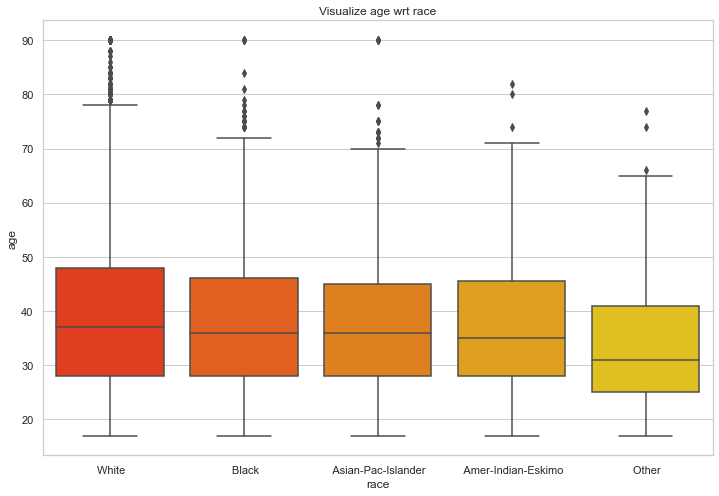

In [38]:
plt.figure(figsize=(12,8))
sns.boxplot(x ='race', y="age", data = df,palette='autumn')
plt.title("Visualize age wrt race")
plt.show()

###### whites are elder than others

##### education_num

In [39]:
df['education_num'].unique()

array([13,  9,  7, 14,  5, 10, 12, 11,  4, 16, 15,  3,  6,  2,  1,  8],
      dtype=int64)

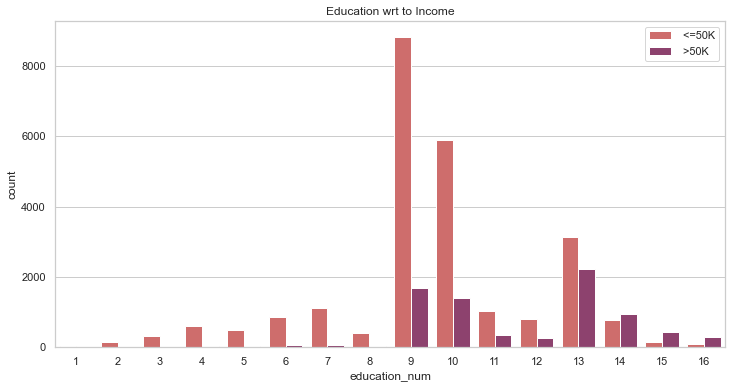

In [40]:
plt.figure(figsize=(12,6))
ax=sns.countplot(x='education_num',hue='income',data=df,palette='flare')
ax.set_title('Education wrt to Income')
ax.legend()

###### people with less than 9 grade are unable to earn >50k

###### hours_per_weak

In [41]:
df['hours_per_week'].describe()

count    32561.000000
mean        40.437456
std         12.347429
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours_per_week, dtype: float64

##### average working hours per week are 40hours

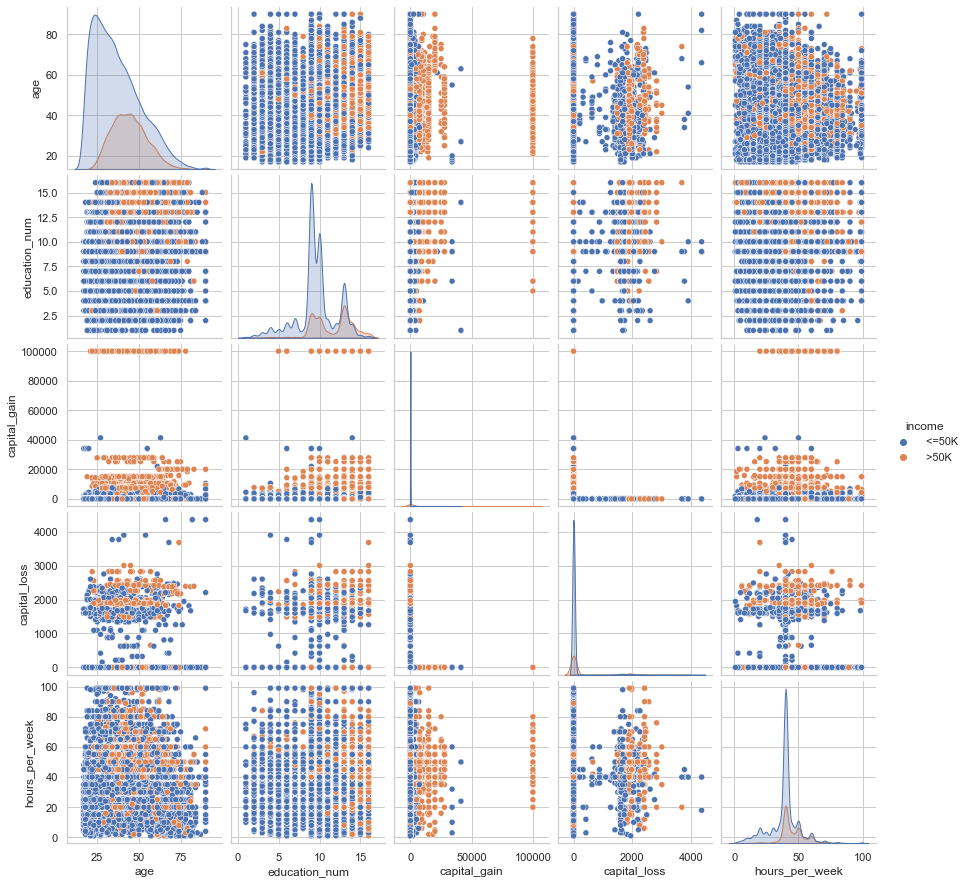

In [42]:
sns.pairplot(df, hue="income")
plt.show()

###### age and fnlwgt are positively skewed
###### education_num, hours_per_week are normaly distributed